# CodSoft / Task 4

`Goal :` Predict the overall amount that consumers would spend on a car given some characteristics.

## Importing librairies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [4]:
cars = pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')
cars

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


## Exploring the data

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
cars.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
cars.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

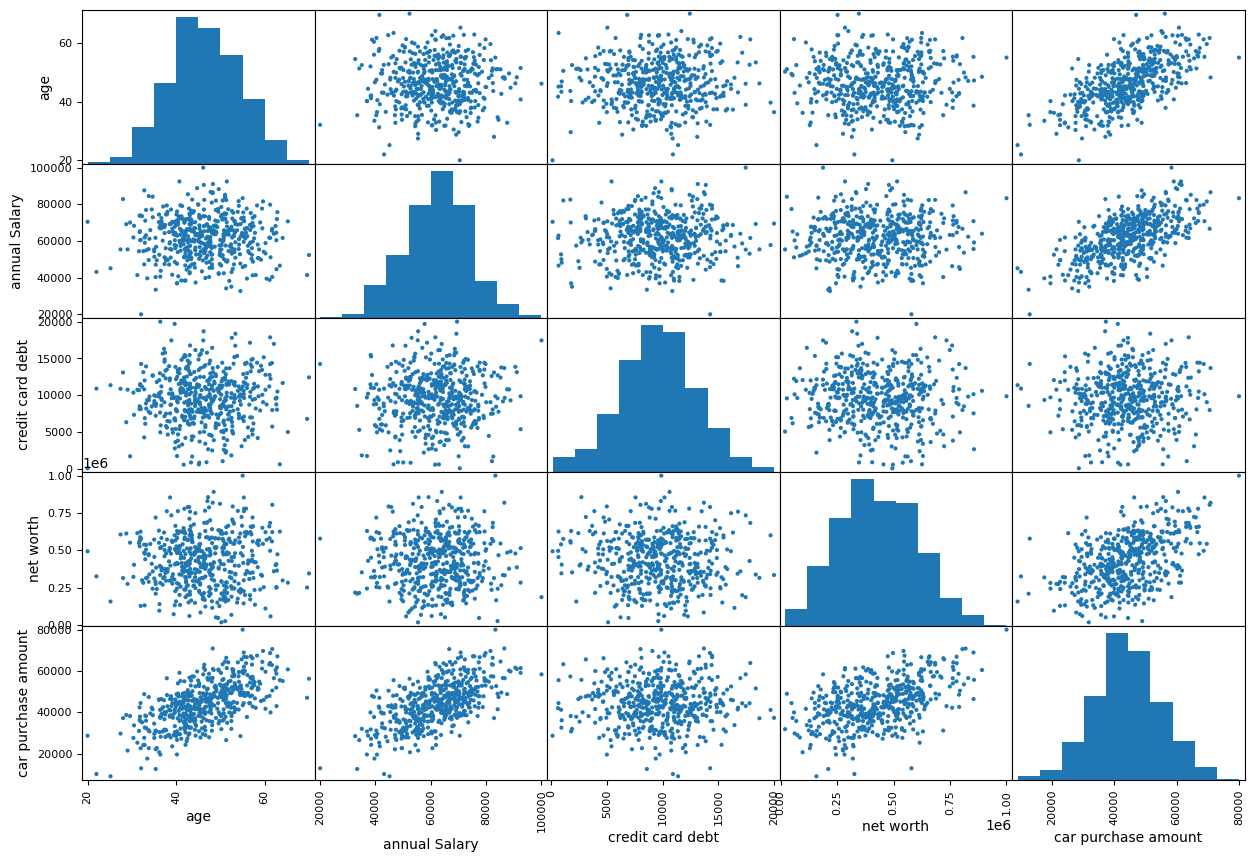

In [8]:
#Keeeping just the predictors that seem helpful for the building of the model
cars = cars[['age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount']]

pd.plotting.scatter_matrix(cars, figsize=(15, 10), alpha = 1);

From the scatter matrix you can notice that there is a postive linear relation between the 'car purchase amount' and the variables : 'age', 'annual salary', 'net worth'.

In [9]:
corr_matrix = cars.corr()
corr_matrix

,age,annual Salary,credit card debt,net worth,car purchase amount
age,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,0.632865,0.617862,0.028882,0.488580,1.000000


The former deduction is confirmed by the correlation matrix.

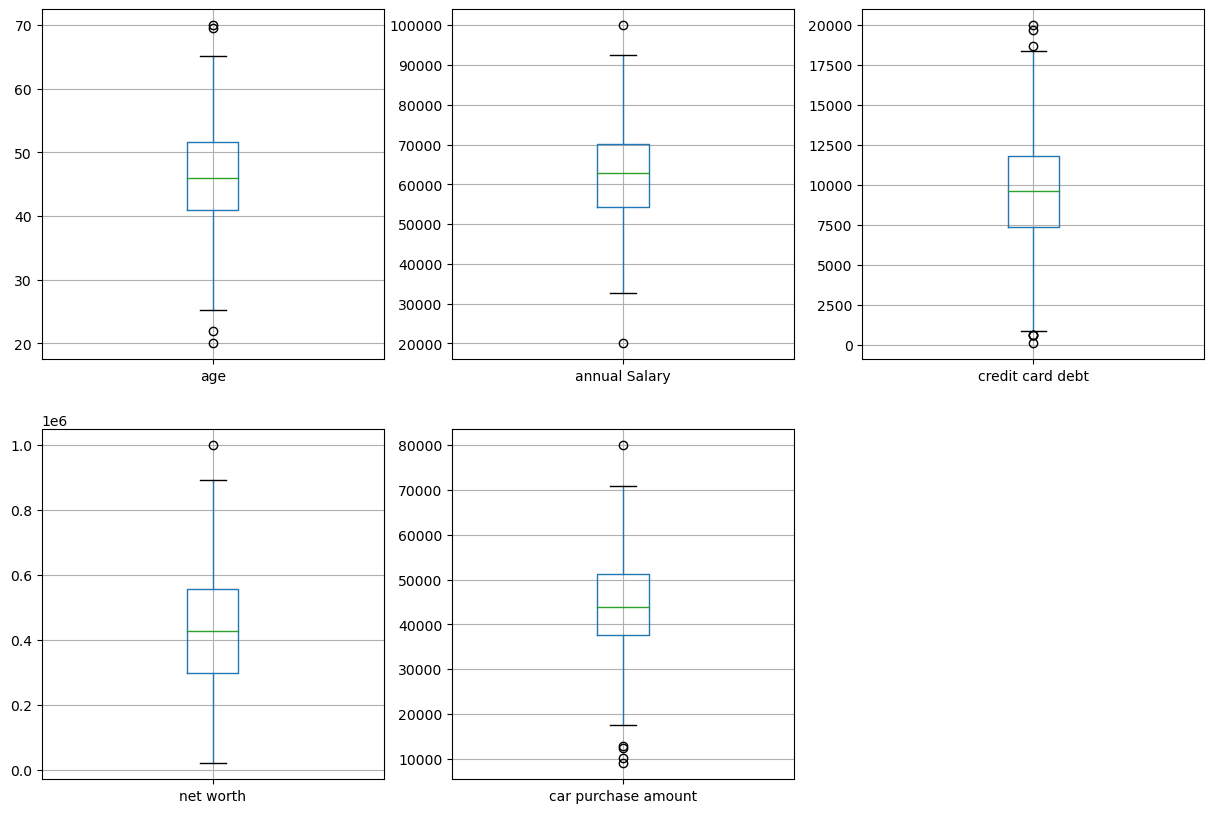

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes[1, 2].axis('off')
cars.boxplot("age", ax=axes[0, 0])
cars.boxplot("annual Salary", ax=axes[0, 1])
cars.boxplot("credit card debt", ax=axes[0, 2])
cars.boxplot("net worth", ax=axes[1, 0])
cars.boxplot("car purchase amount", ax=axes[1, 1]);

## Splitting the data

In [11]:
X = cars.drop("car purchase amount", axis=1)
y = cars["car purchase amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model building

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr_pred = lr.predict(X_test)

In [14]:
print("The mean squared error is :", mean_squared_error(y_test, lr_pred))
print("The mean absolute error is :", mean_absolute_error(y_test, lr_pred))
print("The R2 statistic is :", r2_score(y_test, lr_pred))

The mean squared error is : 2.0698043894627607
The mean absolute error is : 1.1500843450732645
The R2 statistic is : 0.9999999808303804
